In [1]:
import numpy as np, pandas as pd, os, pickle
import gensim
from IPython.display import Audio, display


# Load the D2V model 

In [2]:
import tensorflow
from tensorflow import keras

from gensim.models.doc2vec import Doc2Vec

In [3]:
#load the Doc2Vec model 
model = Doc2Vec.load(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\doc2vecmodel')


In [129]:
type(model)

gensim.models.doc2vec.Doc2Vec

In [130]:
#load the train_corpus from zipped pickle
import bz2
import pickle
import _pickle as cPickle

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data
train_corpus=decompress_pickle(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\train_corpus.pickle.pbz2')


In [131]:
def getVecs(model_name, corpus, size):
    vecs = [np.array(model_name[z.tags[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)
train_vecs_dm = getVecs(model, train_corpus, 100) #use 100 because that is the length of the vector

In [132]:
train_vecs_dm.shape

(150040, 100)

# Prepare the Labels

In [133]:
file_name  = r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\labels.pickle'
train_labels_onehot=pd.read_pickle(file_name)
train_labels_onehot.shape

(150040, 2)

# split the data into train and validation

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_vecs_dm,train_labels_onehot,train_size=0.8, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

120032 30008 120032 30008


In [ ]:
from sklearn.metrics import f1_score

# create a neural network model

first model: 1 hidden layer with 50 nuerons, 10% dropout, 10 epochs

In [135]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from datetime import datetime

def create_model(neurons1, dropout, output):
    #model1 = Sequential([keras.layers.Dense(units=1,input_shape=[100,5])]) 
    model1 = Sequential() 
    model1.add(Dense(neurons1, activation='relu')) 
    model1.add(Dropout(dropout))
    model1.add(Dense(output, activation='sigmoid'))
    return model1

model1=create_model(50,.1,2)
#compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  

#model1.summary()

In [145]:
history = model1.fit(X_train, y_train, epochs=10,batch_size=100,validation_data=(X_test, y_test),verbose=2)
print('Testing F1 score: {}'.format(f1_score(np.argmax(y_test,axis=1), np.argmax(model1.predict(X_test), axis=1))))

Epoch 1/10
1201/1201 - 2s - loss: 0.3031 - accuracy: 0.8670 - val_loss: 0.2988 - val_accuracy: 0.8704 - 2s/epoch - 2ms/step
Epoch 2/10
1201/1201 - 2s - loss: 0.3019 - accuracy: 0.8676 - val_loss: 0.2994 - val_accuracy: 0.8707 - 2s/epoch - 1ms/step
Epoch 3/10
1201/1201 - 1s - loss: 0.3021 - accuracy: 0.8668 - val_loss: 0.2977 - val_accuracy: 0.8706 - 1s/epoch - 1ms/step
Epoch 4/10
1201/1201 - 2s - loss: 0.3015 - accuracy: 0.8679 - val_loss: 0.2972 - val_accuracy: 0.8706 - 2s/epoch - 1ms/step
Epoch 5/10
1201/1201 - 2s - loss: 0.3013 - accuracy: 0.8686 - val_loss: 0.2974 - val_accuracy: 0.8700 - 2s/epoch - 1ms/step
Epoch 6/10
1201/1201 - 2s - loss: 0.3006 - accuracy: 0.8682 - val_loss: 0.2974 - val_accuracy: 0.8709 - 2s/epoch - 1ms/step
Epoch 7/10
1201/1201 - 1s - loss: 0.3007 - accuracy: 0.8681 - val_loss: 0.2967 - val_accuracy: 0.8705 - 1s/epoch - 1ms/step
Epoch 8/10
1201/1201 - 1s - loss: 0.3000 - accuracy: 0.8684 - val_loss: 0.2965 - val_accuracy: 0.8711 - 1s/epoch - 1ms/step
Epoch 9/

In [146]:
model1.save(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\model1Blayer50neurons')

INFO:tensorflow:Assets written to: C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\model1Blayer50neurons\assets


In [147]:
pd.DataFrame(history.history).to_csv(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\model1Blayer50neurons.csv')

In [148]:
history = pd.read_csv(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\model1Blayer50neurons.csv', index_col=0)

In [149]:
history

,loss,accuracy,val_loss,val_accuracy
0,0.303051,0.866960,0.298783,0.870401
1,0.301861,0.867635,0.299433,0.870668
2,0.302082,0.866819,0.297748,0.870634
3,0.301472,0.867927,0.297208,0.870568
4,0.301313,0.868552,0.297360,0.869968
5,0.300569,0.868227,0.297373,0.870901
6,0.300732,0.868127,0.296684,0.870535
7,0.300034,0.868393,0.296498,0.871101
8,0.300137,0.867944,0.296128,0.872534
9,0.299318,0.868718,0.298115,0.869968


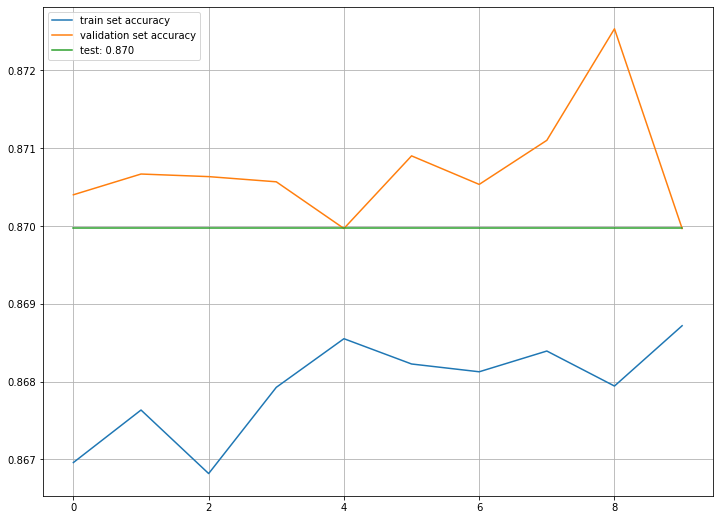

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(history['accuracy'], label='train set accuracy')
plt.plot(history['val_accuracy'], label='validation set accuracy')
_, accuracy = model1.evaluate(X_test, y_test, verbose=0)
plt.plot( np.full( (len(history['val_accuracy']),),fill_value=accuracy), label=f'test: {accuracy:3.3f}');
plt.grid(True); plt.legend();

second model: 10 layers 300 neurons each, 50 epochs

In [151]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from datetime import datetime

def create_model(neurons1, output):
    #layer 1
    model1 = Sequential() 
    model1.add(Dense(neurons1, activation='relu')) 
    #layer 2
    model1.add(Dense(neurons1, activation='relu')) 
     #layer 3
    model1.add(Dense(neurons1, activation='relu')) 
     #layer 4
    model1.add(Dense(neurons1, activation='relu')) 
     #layer 5
    model1.add(Dense(neurons1, activation='relu')) 
     #layer 6
    model1.add(Dense(neurons1, activation='relu')) 
     #layer 7
    model1.add(Dense(neurons1, activation='relu')) 
     #layer 8
    model1.add(Dense(neurons1, activation='relu')) 
     #layer 9
    model1.add(Dense(neurons1, activation='relu')) 
     #layer 10
    model1.add(Dense(neurons1, activation='relu')) 
    model1.add(Dense(output, activation='sigmoid'))
    return model1

model1=create_model(300,2)
#compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  


In [153]:
start=datetime.now()
history = model1.fit(X_train, y_train, epochs=25,batch_size=100,validation_data=(X_test, y_test),verbose=2)
model1.save(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\nn10layers300nueronsB')
pd.DataFrame(history.history).to_csv(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\nn10layers300nueronsB.csv')
finish = datetime.now()

print("training time", finish-start)

print('Validation F1 score: {}'.format(f1_score(np.argmax(y_test,axis=1), np.argmax(model1.predict(X_test), axis=1))))

Epoch 1/25
1201/1201 - 10s - loss: 0.2094 - accuracy: 0.9081 - val_loss: 0.3572 - val_accuracy: 0.8678 - 10s/epoch - 8ms/step
Epoch 2/25
1201/1201 - 10s - loss: 0.2056 - accuracy: 0.9103 - val_loss: 0.3819 - val_accuracy: 0.8674 - 10s/epoch - 8ms/step
Epoch 3/25
1201/1201 - 10s - loss: 0.2043 - accuracy: 0.9106 - val_loss: 0.3710 - val_accuracy: 0.8670 - 10s/epoch - 8ms/step
Epoch 4/25
1201/1201 - 10s - loss: 0.1984 - accuracy: 0.9134 - val_loss: 0.3778 - val_accuracy: 0.8642 - 10s/epoch - 8ms/step
Epoch 5/25
1201/1201 - 10s - loss: 0.1951 - accuracy: 0.9155 - val_loss: 0.3852 - val_accuracy: 0.8631 - 10s/epoch - 8ms/step
Epoch 6/25
1201/1201 - 10s - loss: 0.1940 - accuracy: 0.9168 - val_loss: 0.4538 - val_accuracy: 0.8642 - 10s/epoch - 9ms/step
Epoch 7/25
1201/1201 - 10s - loss: 0.1912 - accuracy: 0.9172 - val_loss: 0.4052 - val_accuracy: 0.8647 - 10s/epoch - 9ms/step
Epoch 8/25
1201/1201 - 11s - loss: 0.1852 - accuracy: 0.9199 - val_loss: 0.4324 - val_accuracy: 0.8637 - 11s/epoch - 9

In [154]:
history = pd.read_csv(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\nn10layers300nueronsB.csv', index_col=0)


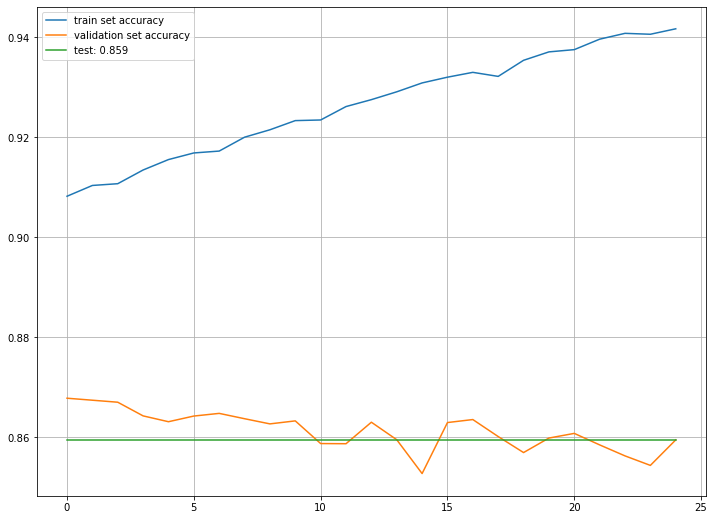

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(history['accuracy'], label='train set accuracy')
plt.plot(history['val_accuracy'], label='validation set accuracy')
_, accuracy = model1.evaluate(X_test, y_test, verbose=0)
plt.plot( np.full( (len(history['val_accuracy']),),fill_value=accuracy), label=f'test: {accuracy:3.3f}');
plt.grid(True); plt.legend();

note: the second model shows a lot of overfitting and the validation accuracy actually starts to decrease

third model: 5 layers of 300 neurons each with batch norm and dropout

In [163]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from datetime import datetime

def create_model(neurons1, dropout, output):
    #layer 1
    model1 = Sequential() 
    model1.add(Dense(neurons1, activation='relu')) 
    model1.add(Dropout(dropout))
    model1.add(BatchNormalization())
    #layer 2
    model1.add(Dense(neurons1, activation='relu')) 
    model1.add(Dropout(dropout))
    model1.add(BatchNormalization())
     #layer 3
    model1.add(Dense(neurons1, activation='relu')) 
    model1.add(Dropout(dropout))
    model1.add(BatchNormalization())
     #layer 4
    model1.add(Dense(neurons1, activation='relu')) 
    model1.add(Dropout(dropout))
    model1.add(BatchNormalization())
     #layer 5
    model1.add(Dense(neurons1, activation='relu')) 
    model1.add(Dropout(dropout))
    model1.add(BatchNormalization())
    model1.add(Dense(output, activation='sigmoid'))
    return model1

model1=create_model(300,.1,2)
#compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  



In [164]:
start=datetime.now()
history = model1.fit(X_train, y_train, epochs=20,batch_size=100,validation_data=(X_test, y_test),verbose=2)
finish = datetime.now()
model1.save(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\nn5layers300B')
pd.DataFrame(history.history).to_csv(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\nn5layers300B.csv')

print("training time", finish-start)
print('Validation F1 score: {}'.format(f1_score(np.argmax(y_test,axis=1), np.argmax(model1.predict(X_test), axis=1))))


Epoch 1/20
1201/1201 - 17s - loss: 0.3463 - accuracy: 0.8461 - val_loss: 0.4030 - val_accuracy: 0.7896 - 17s/epoch - 14ms/step
Epoch 2/20
1201/1201 - 11s - loss: 0.3261 - accuracy: 0.8556 - val_loss: 0.4176 - val_accuracy: 0.7878 - 11s/epoch - 9ms/step
Epoch 3/20
1201/1201 - 10s - loss: 0.3205 - accuracy: 0.8578 - val_loss: 0.4552 - val_accuracy: 0.7731 - 10s/epoch - 8ms/step
Epoch 4/20
1201/1201 - 10s - loss: 0.3168 - accuracy: 0.8595 - val_loss: 0.4894 - val_accuracy: 0.7366 - 10s/epoch - 8ms/step
Epoch 5/20
1201/1201 - 9s - loss: 0.3152 - accuracy: 0.8609 - val_loss: 0.4942 - val_accuracy: 0.7090 - 9s/epoch - 8ms/step
Epoch 6/20
1201/1201 - 10s - loss: 0.3147 - accuracy: 0.8605 - val_loss: 0.5930 - val_accuracy: 0.5904 - 10s/epoch - 8ms/step
Epoch 7/20
1201/1201 - 10s - loss: 0.3115 - accuracy: 0.8624 - val_loss: 0.5268 - val_accuracy: 0.6621 - 10s/epoch - 8ms/step
Epoch 8/20
1201/1201 - 10s - loss: 0.3096 - accuracy: 0.8632 - val_loss: 0.5618 - val_accuracy: 0.6307 - 10s/epoch - 9m

Note: the third model has very low accuracy on the validation set compared tot he other models

fourth model: 2 hidden layers, 300 neurons each, 10% dropout

In [165]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from datetime import datetime

def create_model(neurons1, dropout, output):
    model1 = Sequential() 
    #layer 1
    model1.add(Dense(neurons1, activation='relu')) 
    model1.add(Dropout(dropout))
    #layer 2
    model1.add(Dense(neurons1, activation='relu')) 
    model1.add(Dropout(dropout))
    #output layer
    model1.add(Dense(output, activation='sigmoid'))
    return model1

model1=create_model(300,.1,2)
#compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  

In [166]:
start=datetime.now()
history = model1.fit(X_train, y_train, epochs=20,batch_size=100,validation_data=(X_test, y_test),verbose=2)
finish = datetime.now()
model1.save(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\nn2layers300B')
pd.DataFrame(history.history).to_csv(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\nn2layers300B.csv')
print("training time", finish-start)
print('Validation F1 score: {}'.format(f1_score(np.argmax(y_test,axis=1), np.argmax(model1.predict(X_test), axis=1))))

Epoch 1/20
1201/1201 - 5s - loss: 0.3276 - accuracy: 0.8498 - val_loss: 0.2996 - val_accuracy: 0.8684 - 5s/epoch - 4ms/step
Epoch 2/20
1201/1201 - 4s - loss: 0.3025 - accuracy: 0.8664 - val_loss: 0.2962 - val_accuracy: 0.8720 - 4s/epoch - 3ms/step
Epoch 3/20
1201/1201 - 4s - loss: 0.2981 - accuracy: 0.8688 - val_loss: 0.2963 - val_accuracy: 0.8703 - 4s/epoch - 3ms/step
Epoch 4/20
1201/1201 - 4s - loss: 0.2941 - accuracy: 0.8701 - val_loss: 0.2933 - val_accuracy: 0.8716 - 4s/epoch - 3ms/step
Epoch 5/20
1201/1201 - 4s - loss: 0.2925 - accuracy: 0.8710 - val_loss: 0.2904 - val_accuracy: 0.8732 - 4s/epoch - 3ms/step
Epoch 6/20
1201/1201 - 4s - loss: 0.2894 - accuracy: 0.8729 - val_loss: 0.2947 - val_accuracy: 0.8731 - 4s/epoch - 3ms/step
Epoch 7/20
1201/1201 - 3s - loss: 0.2877 - accuracy: 0.8734 - val_loss: 0.2907 - val_accuracy: 0.8729 - 3s/epoch - 3ms/step
Epoch 8/20
1201/1201 - 4s - loss: 0.2861 - accuracy: 0.8737 - val_loss: 0.2901 - val_accuracy: 0.8748 - 4s/epoch - 3ms/step
Epoch 9/

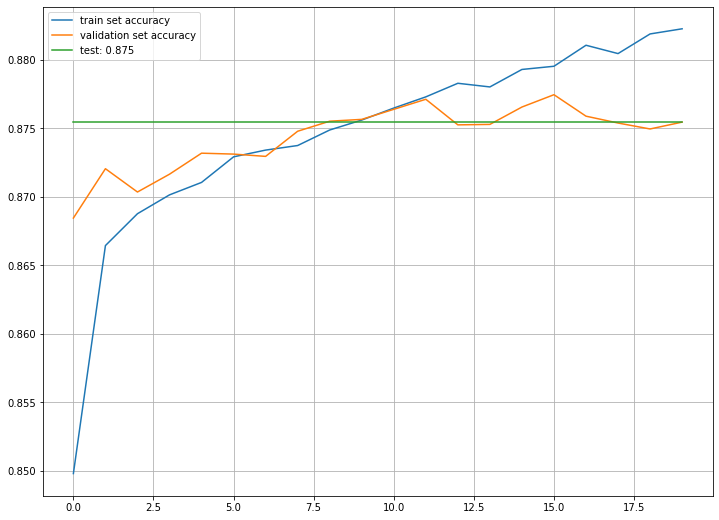

In [167]:
history = pd.read_csv(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\nn2layers300B.csv', index_col=0)
plt.figure(figsize=(12,9))
plt.plot(history['accuracy'], label='train set accuracy')
plt.plot(history['val_accuracy'], label='validation set accuracy')
_, accuracy = model1.evaluate(X_test, y_test, verbose=0)
plt.plot( np.full( (len(history['val_accuracy']),),fill_value=accuracy), label=f'test: {accuracy:3.3f}');
plt.grid(True); plt.legend();

In [168]:
model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 300)               30300     
                                                                 
 dropout_26 (Dropout)        (None, 300)               0         
                                                                 
 dense_71 (Dense)            (None, 300)               90300     
                                                                 
 dropout_27 (Dropout)        (None, 300)               0         
                                                                 
 dense_72 (Dense)            (None, 2)                 602       
                                                                 
Total params: 121,202
Trainable params: 121,202
Non-trainable params: 0
_________________________________________________________________


In [212]:
from sklearn.metrics import precision_score
print('Validation precision %s' % precision_score(np.argmax(y_test,axis=1), np.argmax(model1.predict(X_test), axis=1)))

Validation precision 0.8552657256228452


# Predictions

In [47]:
#load the test_corpus from zipped pickle
import bz2
import pickle
import _pickle as cPickle

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data
test_corpus=decompress_pickle(r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\test_corpus.pbz2')

In [184]:
#put the test set through the existing doc2vec model
start=datetime.now()
def getVecs(model_name, corpus, size):
    vecs = [np.array(model_name[z.tags[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)
test_vecs_dm = getVecs(model, test_corpus, 100) #use 100 because that is the length of the vector
finish=datetime.now()
print("prediction time part 1", finish-start)

prediction time part 1 0:00:06.133228


In [170]:
test_vecs_dm.shape

(37510, 100)

In [171]:
#choose the final model
model_file_name = r"C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\nn2layers300B"
final_model= tensorflow.keras.models.load_model(model_file_name)


In [172]:
predicted_labels = np.argmax(final_model.predict(test_vecs_dm), axis=1)

In [173]:
predicted_labels[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [174]:
#load the test labels
file_name  = r'C:\Users\Elana laptop\Desktop\HebU Big Data\Fall 2021\Machine Learning\Final Project\test_labels.pickle'
test_labels=pd.read_pickle(file_name)
test_labels.shape

(37510,)

In [175]:
(predicted_labels == test_labels).mean()

0.5112236736870168

In [176]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=test_labels, y_pred=predicted_labels)
conf_mat

array([[19039,   142],
       [18192,   137]], dtype=int64)

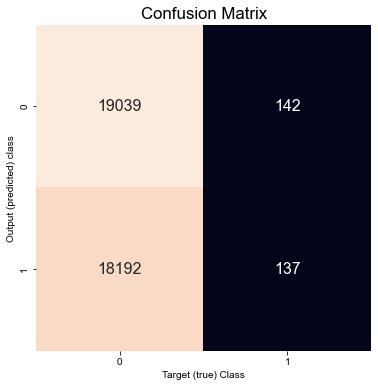

In [182]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

conf_mat = confusion_matrix(test_labels, predicted_labels)

#plot_confusion_matrix(estimator=model, X=test_images_norm, y_true=test_labels )
plt.subplots(figsize=(6,6))
sn.set(font_scale=1.4) # for label size
sn.heatmap(conf_mat, annot=True, fmt=".0f", annot_kws={"size": 16}, cbar=False) # font size
plt.xlabel('Target (true) Class'); plt.ylabel('Output (predicted) class'); plt.title('Confusion Matrix')
plt.show()


In [185]:
start=datetime.now()
final_model.predict(test_vecs_norm)
finish=datetime.now()
print("prediction time part 2", finish-start)

prediction time part 2 0:00:02.563395


calculate precision

In [211]:
from sklearn.metrics import precision_score
print('Testing precision %s' % precision_score(test_labels, predicted_labels))

Testing precision 0.4910394265232975


In [178]:
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(test_labels, predicted_labels))
print('Testing F1 score: {}'.format(f1_score(test_labels, predicted_labels, average='weighted')))

Testing accuracy 0.5112236736870168
Testing F1 score: 0.3523602443442039


check why the accuracy on the test set was so low

In [179]:
#check the distribution of the test set
df_test_labels= pd.DataFrame(test_labels, columns=['label'])
df_test_labels['label'].value_counts(normalize=True)

0    0.511357
1    0.488643
Name: label, dtype: float64

In [180]:
#check the distribution of the validation set
df_y_test=pd.DataFrame(np.argmax(y_test, axis=1),columns=['label'])
df_y_test['label'].value_counts(normalize=True)

0    0.51143
1    0.48857
Name: label, dtype: float64

In [181]:
#check the distribution of the train set
df_y_train=pd.DataFrame(np.argmax(y_train, axis=1),columns=['label'])
df_y_train['label'].value_counts(normalize=True)

0    0.513821
1    0.486179
Name: label, dtype: float64

# Sample Predictions

In [196]:
df_predicitons= pd.DataFrame(test_corpus)

In [197]:
df_predicted_labels = predicted_labels

In [207]:
df_labelled_predictions= pd.DataFrame(zip(test_corpus, predicted_labels,test_labels), columns= ['words','predicted label','true_label'])

In [208]:
df_labelled_predictions.head()

,words,predicted label,true_label
0,"([var a0_0x190c = [, 'result',, '68757...",0,1
1,"([(function ($fog$1691, $fog$0, $fog$1, $fog$2...",0,1
2,"([(function(){function a(f,g){var b=new Array(...",0,1
3,"([var a0_0x1616 = [, 'serialize',, '#s...",0,1
4,"([if (typeof KJUR == ""undefined"" || !KJUR) KJU...",0,0


In [209]:
df_labelled_predictions['predicted label'].value_counts()

0    37231
1      279
Name: predicted label, dtype: int64